In [288]:
using DataFrames
using CSV
include("functions/plotting_base_gd.jl")

plot_all_tariffs_per_company (generic function with 2 methods)

In [289]:
# Read in all of the utility bills for the various utilities and tariff types
base_GD = CSV.read("data/Base_GD.csv")

# Narrow down to {Residential | Commerical | etc} {CNFL | ICE | ESPH | JASEC} customers

all_cnfl = filter(row -> (!ismissing(row.EMPRESA) && row.EMPRESA == "CNFL"), base_GD)
all_cnfl_tariff_split = Array{DataFrame}(undef, 12)

# Loop through all tariffs
for i=1:12
    next_cnfl_value = filter(row -> (!ismissing(row.CODIGO_TARIFA) && row.CODIGO_TARIFA == string(i)), all_cnfl)
    all_cnfl_tariff_split[i] = next_cnfl_value
end

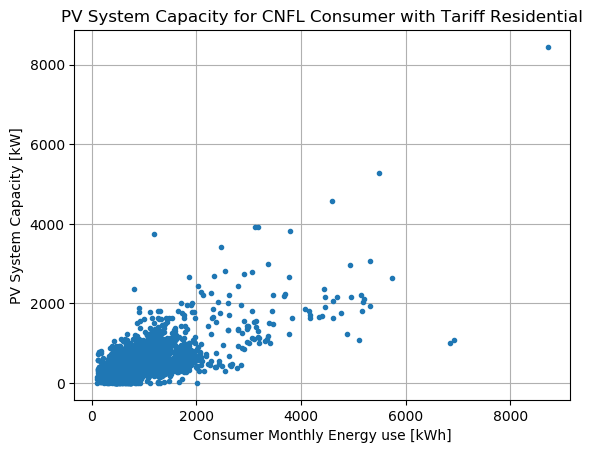

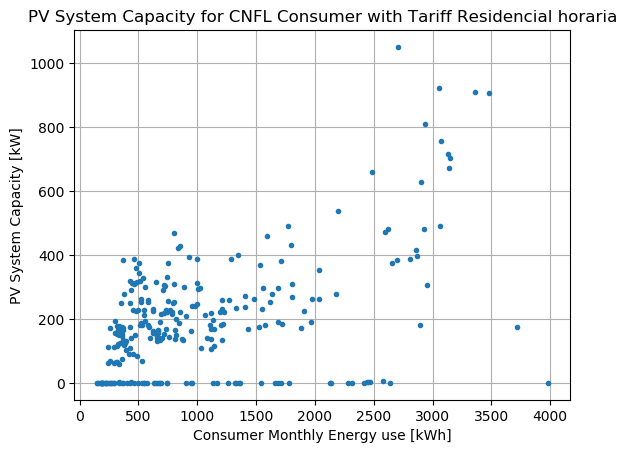

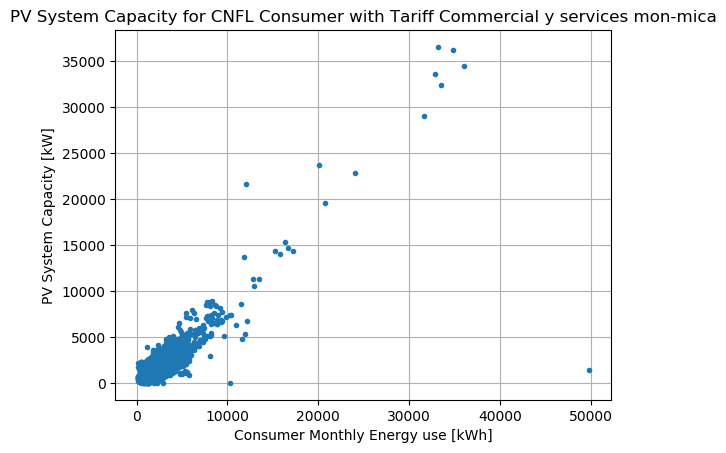

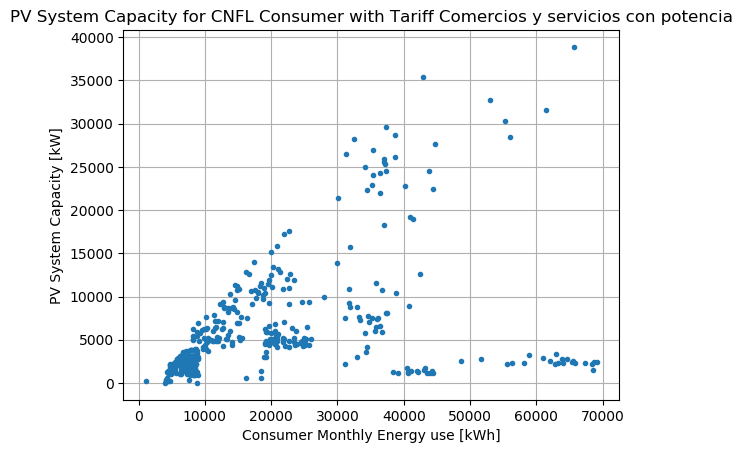

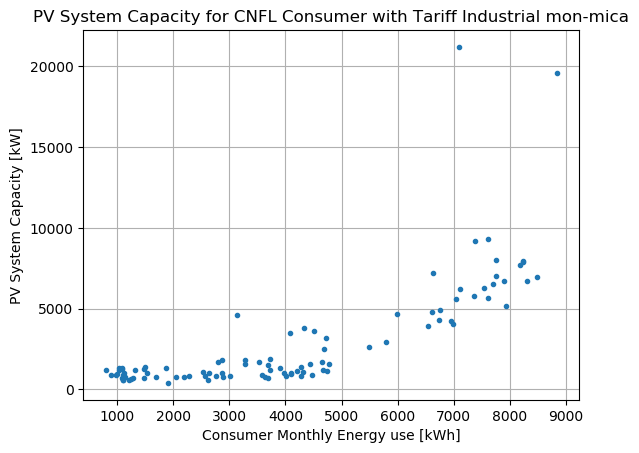

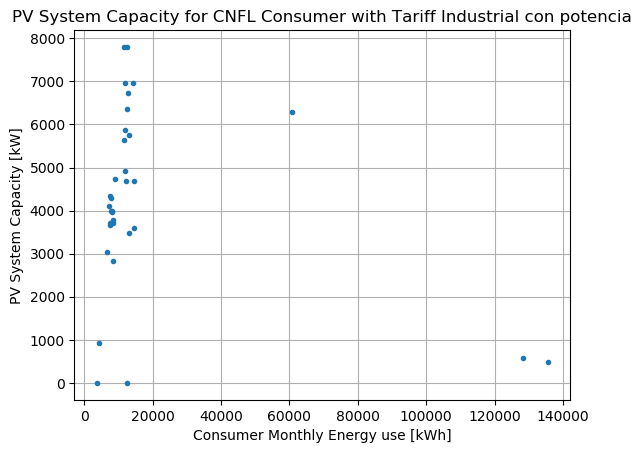

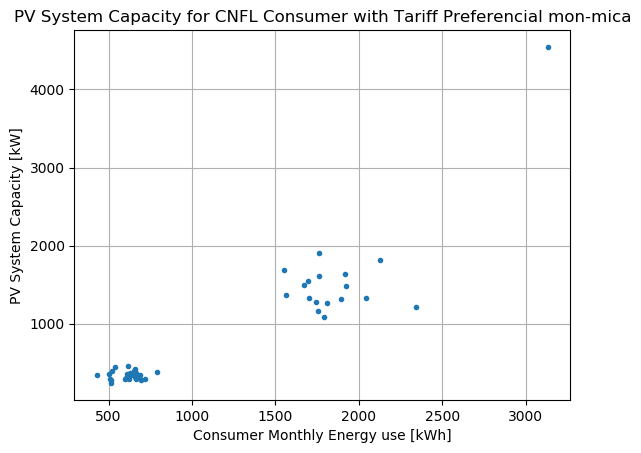

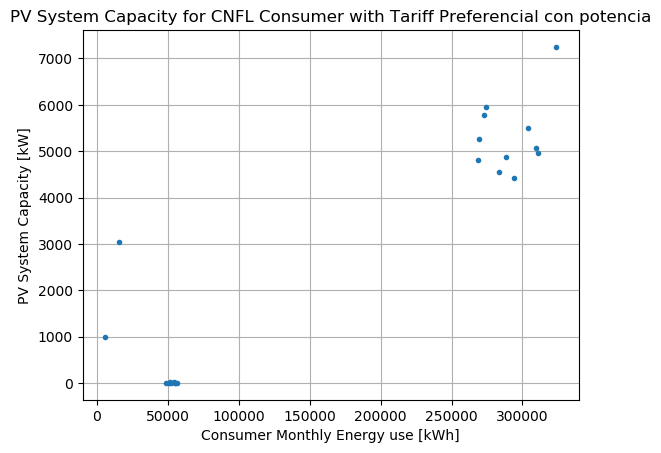

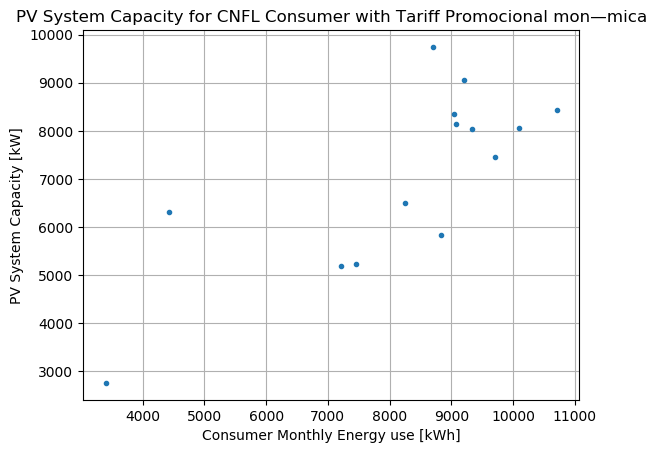

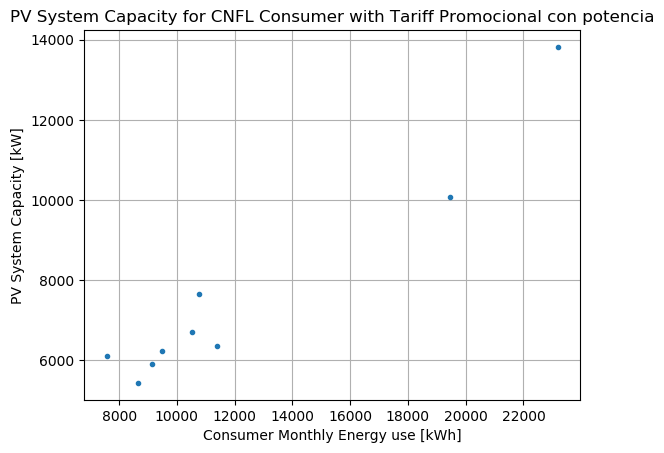

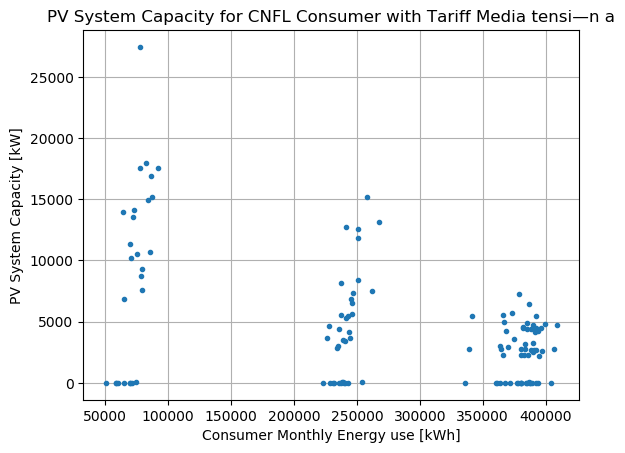

In [290]:
plot_all_tariffs_per_company(all_cnfl_tariff_split, "CNFL")